<a href="https://colab.research.google.com/github/supersonicspeedjj/Project-ayurved/blob/main/DiseasePredicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset / Data Preprocesing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
%cd "drive/MyDrive/DiseaseClassification"
!pwd

In [ ]:
!pwd
!ls

/content/drive/MyDrive/DiseaseClassification
Testing.csv  Training.csv


In [ ]:
dftest = pd.read_csv('Testing.csv')
dftrain = pd.read_csv('Training.csv')

In [ ]:
#Dataset Display Optional
dftrain.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


## Drop Invalid Infos

In [ ]:
null_columns = dftrain.columns[dftrain.isnull().any()]
dftrain[null_columns].isnull().sum()
dftrain.drop('Unnamed: 133', axis=1, inplace=True)
dftrain.info()


In [ ]:
null_columns=dftest.columns[dftest.isnull().any()]
dftest[null_columns].isnull().sum()

Series([], dtype: float64)

### Do Not RUN this

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dftrain is your DataFrame
columns = list(dftrain.columns)

# Set a Seaborn style
sns.set(style="whitegrid")

# Define colors
colors = ['red', 'blue']

# Create subplots
fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(8, 3 * len(columns)))

# Iterate through each column
for i, column in enumerate(columns):
    # Plot the count for each symptom
    sns.countplot(x=column, data=dftrain, palette=colors, ax=axs[i])

    # Add labels and title
    axs[i].set_title("Count of Symptom \"" + column + "\"", fontsize=14)
    axs[i].set_xlabel(column, fontsize=12)
    axs[i].set_ylabel("Count", fontsize=12)

    # Add percentage labels on top of bars
    total = len(dftrain[column])
    for p in axs[i].patches:
        height = p.get_height()
        axs[i].text(p.get_x() + p.get_width() / 2., height + 0.1,
                    f'{height/total:.1%}', ha="center", fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

# Data Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math
from joblib import dump, load

# split dataset into attributes and labels
X_train = dftrain.iloc[:, :-1].values # the training attributes
y_train = dftrain.iloc[:, 132].values # the training labels
X_test = dftest.iloc[:, :-1].values # the testing attributes
y_test = dftest.iloc[:, 132].values # the testing labels

In [ ]:
#Decision Tree
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [ ]:
#Random Forest
classifierRF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

In [ ]:
#MLP
classifierMLP = MLPClassifier()
classifierMLP.fit(X_train, y_train)

MLPClassifier()

### Saving the Models

In [ ]:
dump(classifierDT,'DecisionTree.joblib')


['classifierMLP.joblib']

In [ ]:
dump(classifierRF,'RandomForest.joblib')


['RandomForest.joblib']

In [ ]:
dump(classifierMLP,'classifierMLP.joblib')

['classifierMLP.joblib']

In [ ]:
!ls

classifierMLP.joblib  DecisionTree.joblib  RandomForest.joblib	Testing.csv  Training.csv


# Accuracy Testing \(Optional)

In [ ]:
y_predMLP = classifierMLP.predict(X_test)
y_predDT = classifierDT.predict(X_test)
y_predRF = classifierRF.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#MLP
print(confusion_matrix(y_test, y_predMLP))
print(classification_report(y_test, y_predMLP))
print("Train Accuracy: ", accuracy_score(y_train, classifierMLP.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predMLP))

In [ ]:
#RandomForest
print(confusion_matrix(y_test, y_predRF))
print(classification_report(y_test, y_predRF))
print("Train Accuracy: ", accuracy_score(y_train, classifierRF.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predRF))

In [ ]:
#DecisionTree
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

### Comparison

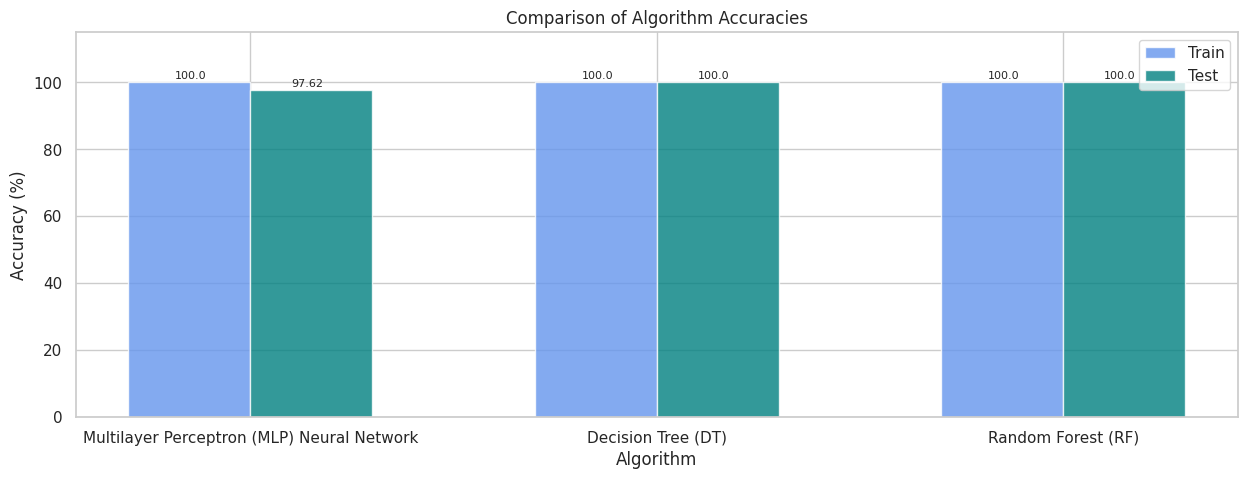

In [ ]:
n_groups = 3
algorithms = ('Multilayer Perceptron (MLP) Neural Network', 'Decision Tree (DT)', 'Random Forest (RF)')
train_accuracy = (accuracy_score(y_train, classifierMLP.predict(X_train))*100,
                  accuracy_score(y_train, classifierDT.predict(X_train))*100,
                  accuracy_score(y_train, classifierRF.predict(X_train))*100)
test_accuracy = (accuracy_score(y_test, y_predMLP)*100,
                 accuracy_score(y_test, y_predDT)*100,
                 accuracy_score(y_test, y_predRF)*100)

# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
plt.show()

#Prediction

Note: Now that our Models are trained, these models have a total of 133 Features inputs. While this much is sufficient, we can't take this much input from the users so we'll have to fill the unused ones with 0s.

In [ ]:
test = dftest.iloc[0].values #Fungal Infection

132


In [ ]:
predMLP = classifierMLP.predict([[float(x) for x in test[0:-1]]]) #MLP requires Float all else can work with int
predMLP

array(['Fungal infection'], dtype='<U39')